### Step 1

In [1]:
import pandas as pd

fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)

### Step 2

In [2]:
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)

### Step 3

In [3]:
fert.shape

(260, 216)

In [4]:
life.shape

(260, 217)

### Step 4

In [5]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [6]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [7]:
ncol = [int(x) for x in fert.columns]

fert.set_axis(axis=1, labels=ncol, inplace=True)

In [8]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

### Step 5

In [9]:
sfert = fert.stack()
slife = life.stack()

In [10]:
d = {'fertility': sfert, 'lifeexp': slife}
df2 = pd.DataFrame(data=d)

In [11]:
df2

fertility  lifeexp
Afghanistan 1800        7.0    28.21
            1801        7.0    28.20
            1802        7.0    28.19
            1803        7.0    28.18
            1804        7.0    28.17
...                     ...      ...
Åland       2002        NaN    81.80
            2003        NaN    80.63
            2004        NaN    79.88
            2005        NaN    80.00
            2006        NaN    80.10

[44007 rows x 2 columns]

### Step 6

In [12]:
pop = pd.read_excel('gapminder_population.xlsx', index_col=0)

In [13]:
pop.shape

(275, 81)

In [14]:
pop.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [15]:
spop = pop.stack()

In [16]:
d2 = {'fertility': sfert, 'lifeexp': slife, 'population': spop}
df_pop = pd.DataFrame(data=d2)

In [17]:
df_pop['population'] = df_pop['population'] / 1000000

In [18]:
df_pop

fertility  lifeexp  population
Afghanistan 1800        7.0    28.21    3.280000
            1801        7.0    28.20         NaN
            1802        7.0    28.19         NaN
            1803        7.0    28.18         NaN
            1804        7.0    28.17         NaN
...                     ...      ...         ...
Åland       2006        NaN    80.10    0.026923
            2007        NaN      NaN    0.026923
            2008        NaN      NaN    0.026923
            2009        NaN      NaN    0.026923
            2010        NaN      NaN    0.026923

[47688 rows x 3 columns]

### Step 7

In [19]:
df3 = df_pop.stack()
df3

Afghanistan  1800  fertility      7.000000
                   lifeexp       28.210000
                   population     3.280000
             1801  fertility      7.000000
                   lifeexp       28.200000
                                   ...    
Åland        2006  population     0.026923
             2007  population     0.026923
             2008  population     0.026923
             2009  population     0.026923
             2010  population     0.026923
Length: 107445, dtype: float64

In [20]:
df4 = df3.unstack((0,2))
df4

Afghanistan                    Akrotiri and Dhekelia   Albania          \
       fertility lifeexp population            population fertility lifeexp   
1800        7.00   28.21   3.280000                   NaN      4.60    35.4   
1801        7.00   28.20        NaN                   NaN      4.60    35.4   
1802        7.00   28.19        NaN                   NaN      4.60    35.4   
1803        7.00   28.18        NaN                   NaN      4.60    35.4   
1804        7.00   28.17        NaN                   NaN      4.60    35.4   
...          ...     ...        ...                   ...       ...     ...   
2012        5.14   54.40  29.726803                   NaN      1.76    77.5   
2013        4.90   54.80  30.682500                   NaN      1.77    77.7   
2014        4.68   54.90  31.627506                   NaN      1.78    77.9   
2015        4.47   53.80  32.526562                   NaN      1.78    78.0   
2016         NaN   52.72        NaN                   NaN       NaN    78.1   

                  Algeria                     ...      Yemen Yugoslavia  \
     population fertility lifeexp population  ... population population   
1800   0.410445      6.99   28.82   2.503218  ...   2.593000        NaN   
1801        NaN      6.99   28.82        NaN  ...        NaN        NaN   
1802        NaN      6.99   28.82        NaN  ...        NaN        NaN   
1803        NaN      6.99   28.82        NaN  ...        NaN        NaN   
1804        NaN      6.99   28.82        NaN  ...        NaN        NaN   
...         ...       ...     ...        ...  ...        ...        ...   
2012   2.880667      2.82   76.20  37.439427  ...  24.882792        NaN   
2013   2.883281      2.80   76.30  38.186135  ...  25.533217        NaN   
2014   2.889676      2.76   76.30  38.934334  ...  26.183676        NaN   
2015   2.896679      2.71   76.40  39.666519  ...  26.832215        NaN   
2016        NaN       NaN   76.50        NaN  ...        NaN        NaN   

        Zambia                     Zimbabwe                         Åland  \
     fertility lifeexp population fertility lifeexp population population   
1800      6.71    32.6   0.747000      6.75   33.70   1.085814        NaN   
1801      6.71    32.6        NaN      6.75   33.70        NaN        NaN   
1802      6.71    32.6        NaN      6.75   33.70        NaN        NaN   
1803      6.71    32.6        NaN      6.75   33.70        NaN        NaN   
1804      6.71    32.6        NaN      6.75   33.70        NaN        NaN   
...        ...     ...        ...       ...     ...        ...        ...   
2012      5.73    54.7  14.786581      3.56   54.20  14.565482        NaN   
2013      5.69    55.6  15.246086      3.49   55.70  14.898092        NaN   
2014      5.64    56.3  15.721343      3.41   57.00  15.245855        NaN   
2015      5.59    56.7  16.211767      3.35   59.30  15.602751        NaN   
2016       NaN    57.1        NaN       NaN   61.69        NaN        NaN   

              
     lifeexp  
1800     NaN  
1801     NaN  
1802     NaN  
1803     NaN  
1804     NaN  
...      ...  
2012     NaN  
2013     NaN  
2014     NaN  
2015     NaN  
2016     NaN  

[217 rows x 667 columns]

### Step 8

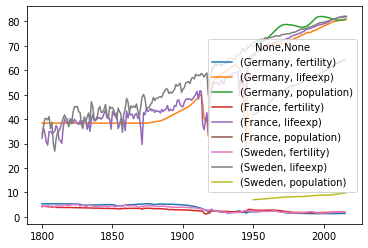

In [21]:
import pylab as plt
df4[['Germany', 'France', 'Sweden']].plot()

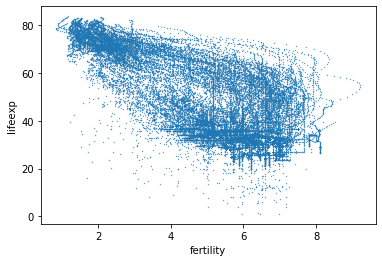

In [22]:
df5 = df3.unstack(2)
df5.plot.scatter('fertility', 'lifeexp', s=0.1)

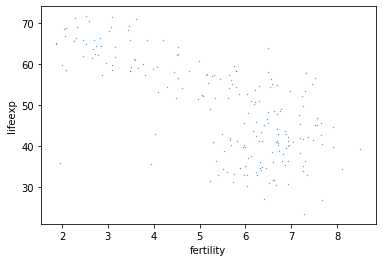

In [23]:
df6 = df3.unstack(1)
df6 = df6[1950]
df6 = df6.unstack(1)
df6.plot.scatter('fertility', 'lifeexp', s=0.1)

### Step 9

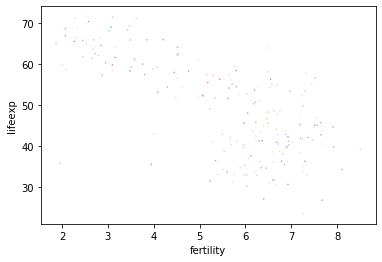

In [24]:
cmap = plt.get_cmap('tab20', lut = len(df6)).colors
df6.plot.scatter('fertility', 'lifeexp', s=0.1, c=cmap)

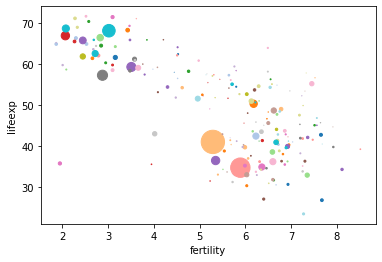

In [25]:
df6.plot.scatter('fertility', 'lifeexp', s=df6['population'], c=cmap)

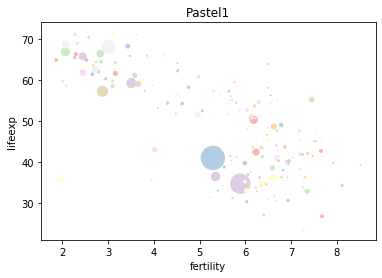

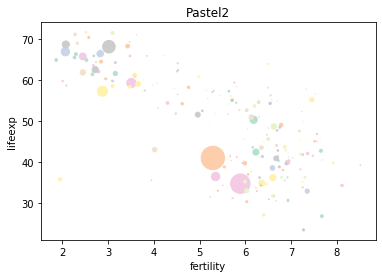

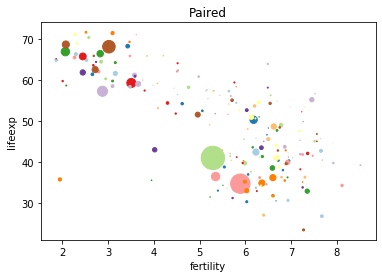

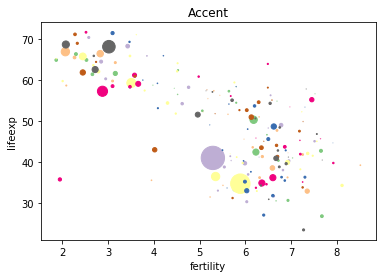

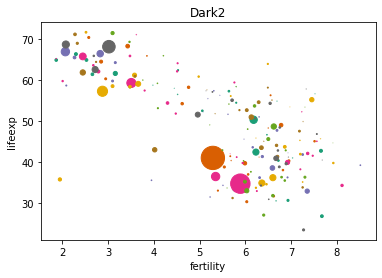

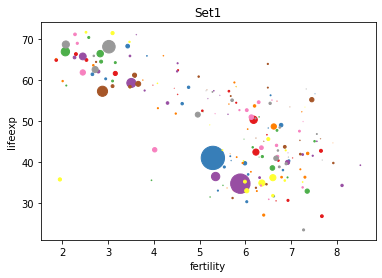

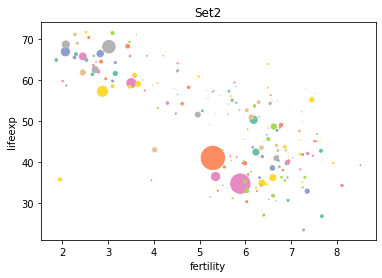

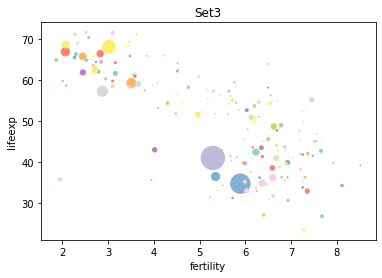

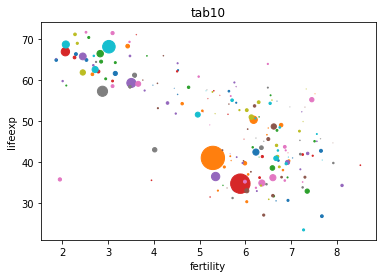

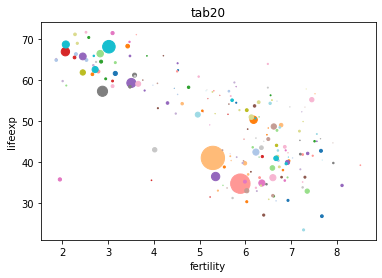

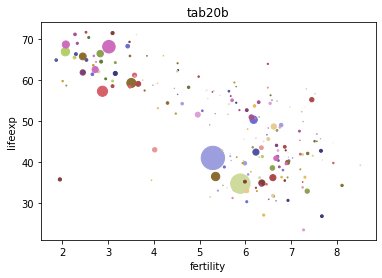

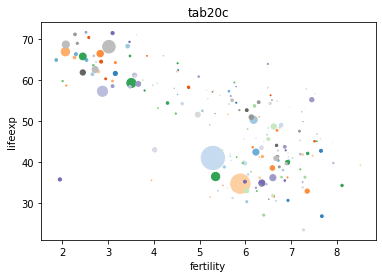

In [55]:
# playing around with different colormaps

cmap_styles = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

for style in cmap_styles:
    cmap = plt.get_cmap(style, lut = len(df6)).colors
    df6.plot.scatter('fertility', 'lifeexp', s=df6['population'], c=cmap)
    plt.title(style)

### Step 10

In [30]:
df7 = df3.unstack(1)


,fertility,lifeexp,population
Afghanistan,7.67,31.94,8.994793
Akrotiri and Dhekelia,NaN,NaN,0.011439
Albania,6.19,62.87,1.636054
Algeria,7.65,47.50,11.124892
American Samoa,NaN,NaN,0.020012
...,...,...,...
Yemen,7.29,32.64,5.166311
Yugoslavia,NaN,NaN,18.139623
Zambia,7.02,48.34,3.049586
Zimbabwe,7.16,53.11,3.752390


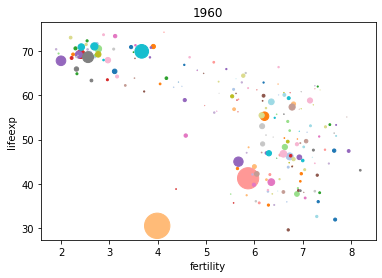

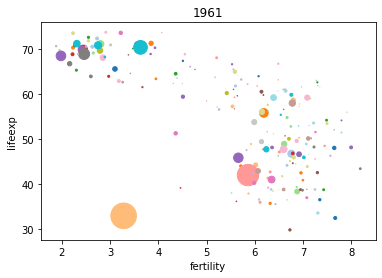

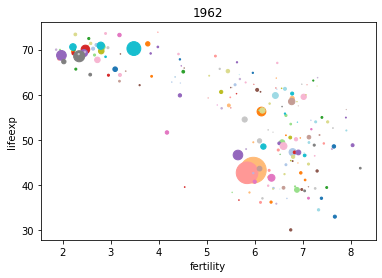

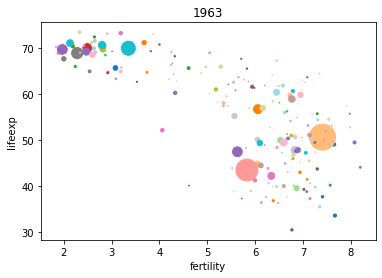

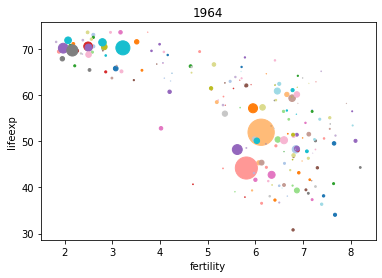

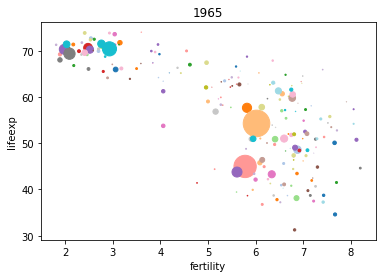

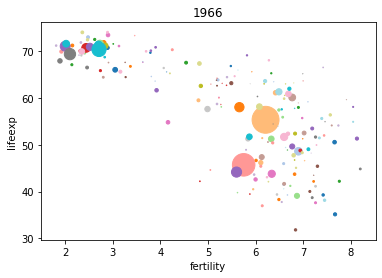

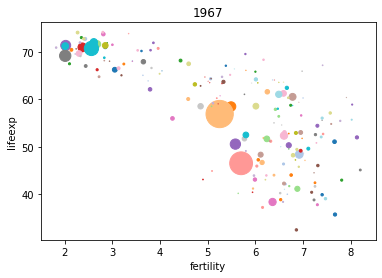

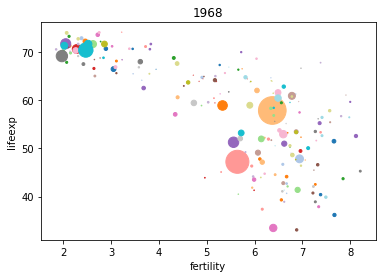

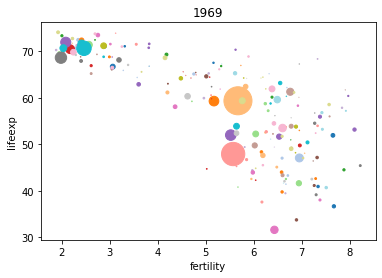

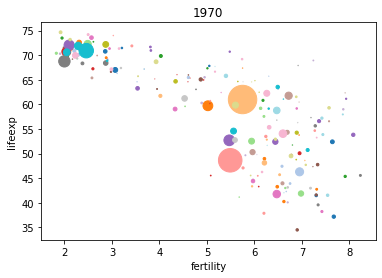

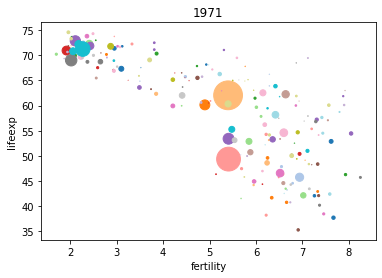

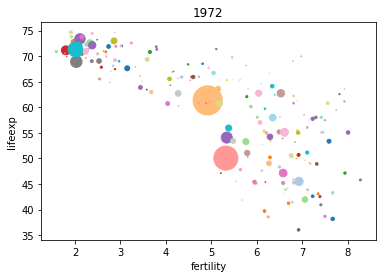

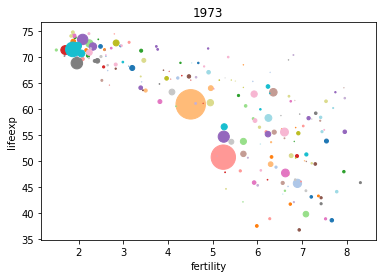

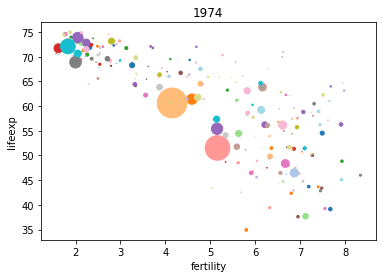

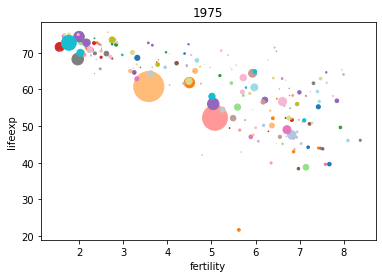

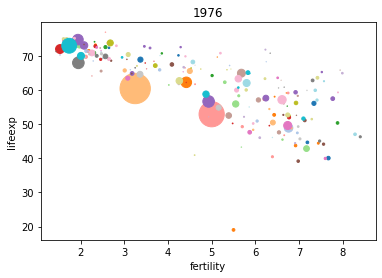

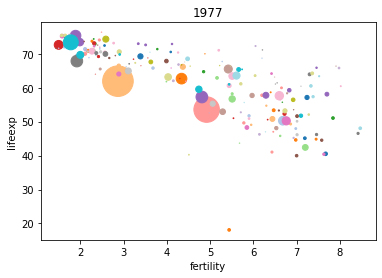

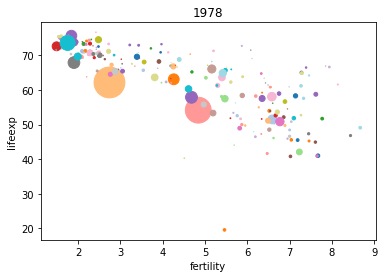

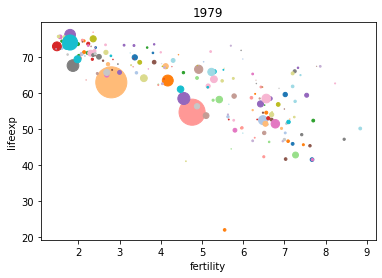

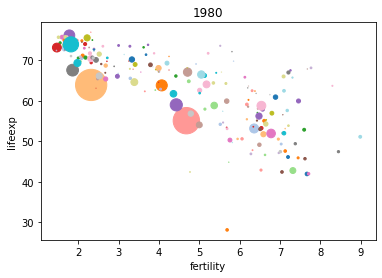

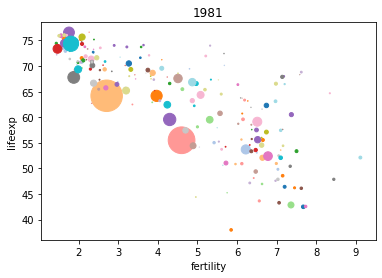

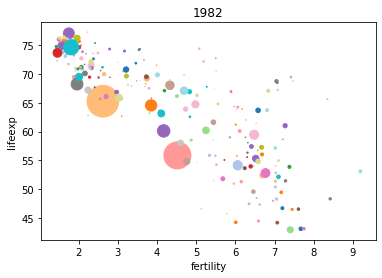

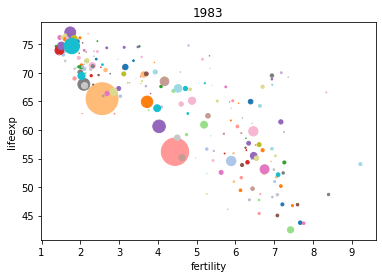

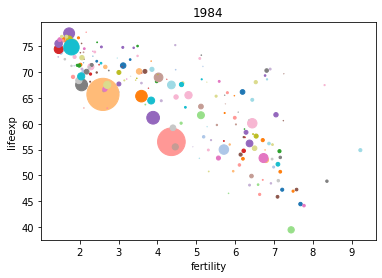

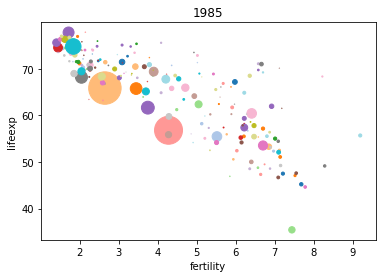

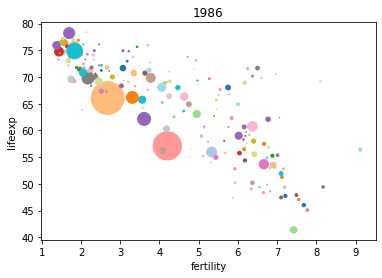

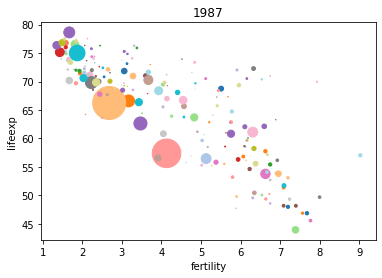

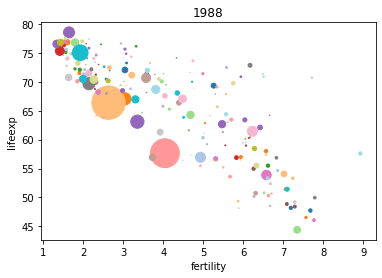

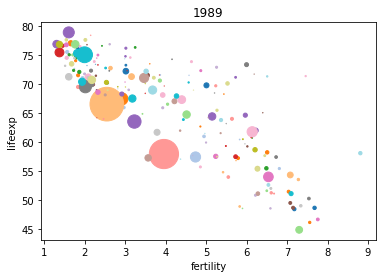

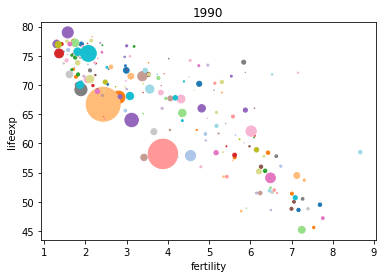

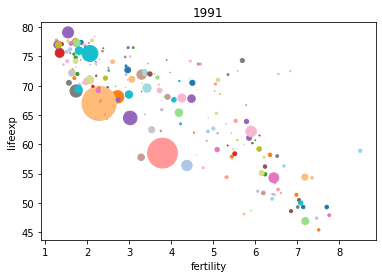

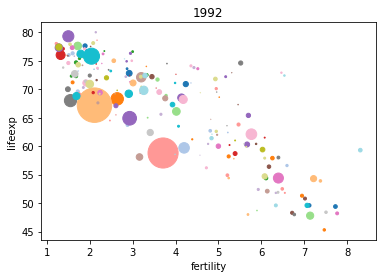

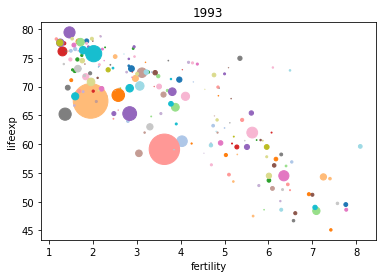

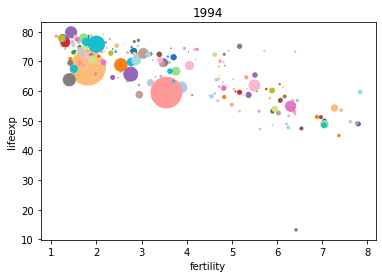

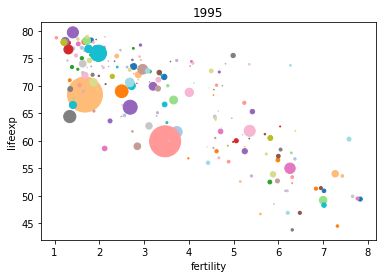

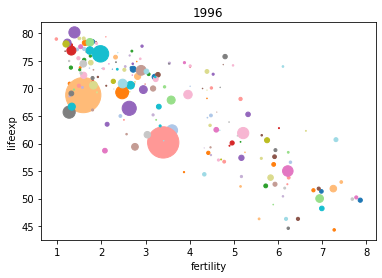

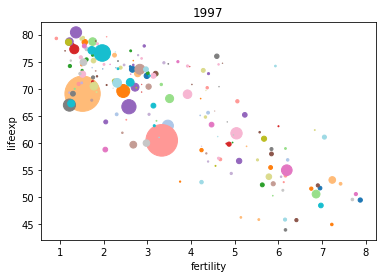

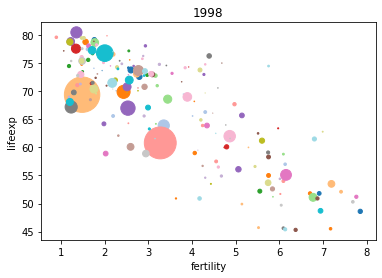

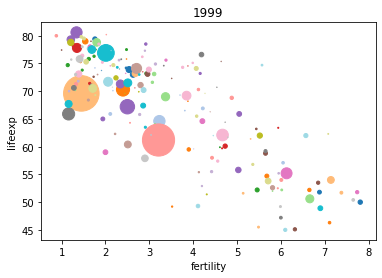

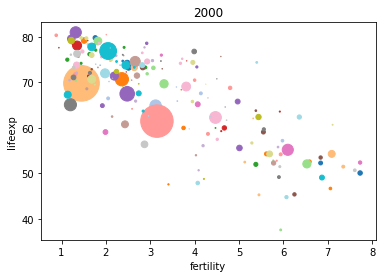

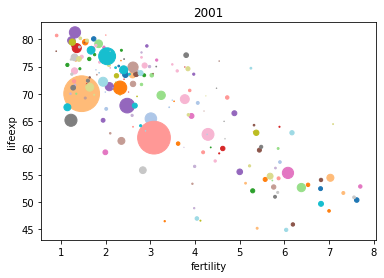

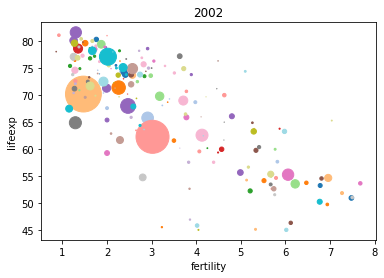

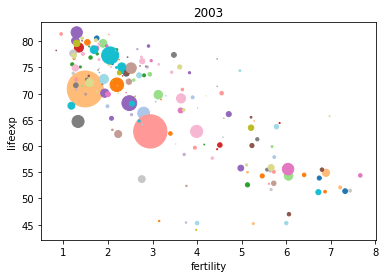

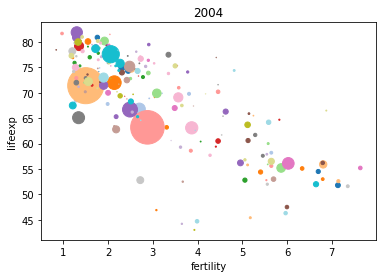

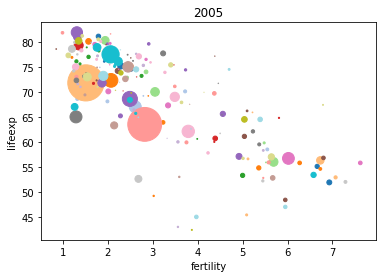

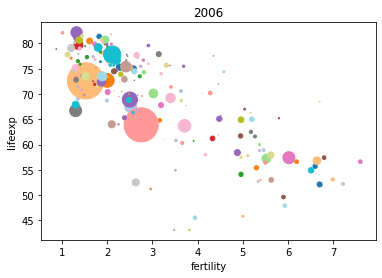

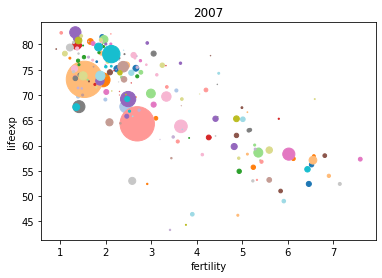

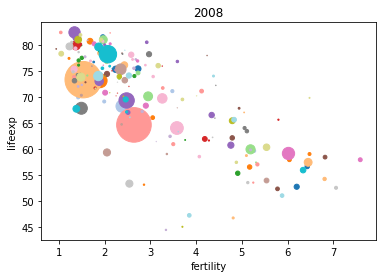

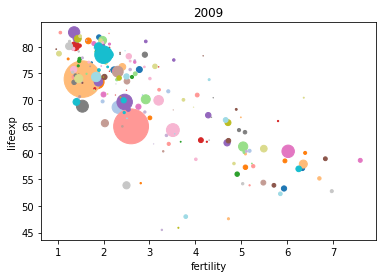

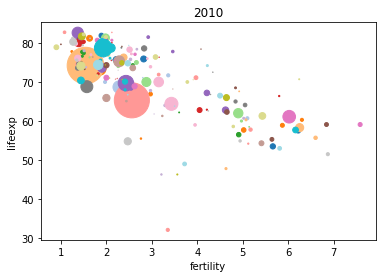

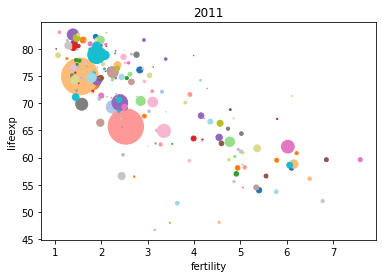

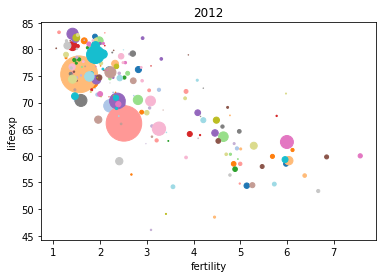

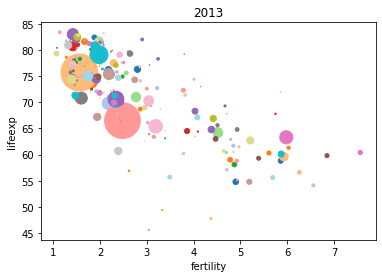

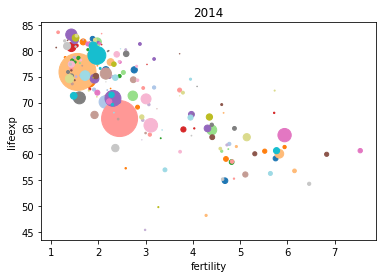

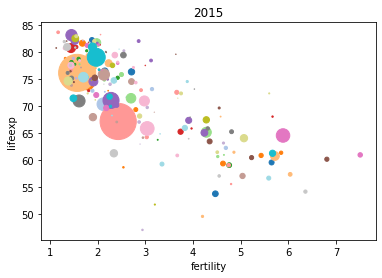

In [51]:
for i in range(1960, 2016):
    new_df = df7[i]
    new_df = new_df.unstack(1)
    new_df
    cmap2 = plt.get_cmap('tab20', lut = len(new_df)).colors
    new_df.plot.scatter('fertility', 'lifeexp', s=new_df['population'], c=cmap)
    plt.title(f'{i}')
    plt.savefig(f'scatter_images/{i}.png')

### Step 11

In [48]:
# already implemented

### Step 12

In [52]:
import imageio

images = []

for i in range(1960, 2016):
    filename = 'scatter_images/{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=20)

